In [4]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

In [5]:
from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


**Unzip dataset**


In [6]:
if os.path.exists("/content/CT_MD") and os.path.isdir("/content/CT_MD"):
    shutil.rmtree("/content/CT_MD")


!unzip "/content/drive/MyDrive/Datasets/CT_MD.zip"

Streaming output truncated to the last 5000 lines.
  inflating: CT_MD/data/Train/Norm/N_48_70.png  
  inflating: CT_MD/data/Train/Cov/C_44_85.png  
  inflating: CT_MD/data/Train/Norm/N_48_80.png  
  inflating: CT_MD/data/Valid/Cov/C_24_33.png  
  inflating: CT_MD/data/Test/Cov/C_18_18.png  
  inflating: CT_MD/data/Valid/Norm/N_26_74.png  
  inflating: CT_MD/data/Train/Cov/C_48_46.png  
  inflating: CT_MD/data/Train/Cap/P_14_50.png  
  inflating: CT_MD/data/Test/Cap/P_6_42.png  
  inflating: CT_MD/data/Train/Cov/C_48_82.png  
  inflating: CT_MD/data/Train/Cov/C_47_32.png  
  inflating: CT_MD/data/Train/Cap/P_13_4.png  
  inflating: CT_MD/data/Train/Cov/C_43_39.png  
  inflating: CT_MD/data/Valid/Norm/N_26_52.png  
  inflating: CT_MD/data/Train/Cap/P_11_78.png  
  inflating: CT_MD/data/Test/Norm/N_14_12.png  
  inflating: CT_MD/data/Test/Norm/N_27_17.png  
  inflating: CT_MD/data/Train/Cov/C_43_12.png  
  inflating: CT_MD/data/Train/Cap/P_14_51.png  
  inflating: CT_MD/data/Valid/Cov/C_2

###Data is unzipped at location "/content/CT_MD"

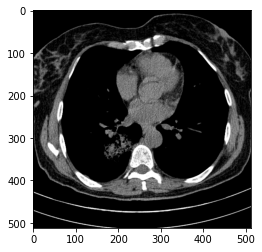

In [7]:
img=image.load_img("/content/CT_MD/data/Train/Cov/C_10_11.png")
plt.imshow(img)

In [8]:
cv2.imread("/content/CT_MD/data/Train/Cov/C_10_11.png").shape

(512, 512, 3)

In [9]:
cv2.imread("/content/CT_MD/data/Train/Cap/P_10_11.png").shape

(512, 512, 3)

In [10]:
import os,cv2,numpy as np
import shutil
PATH = os.getcwd()
# Define data path
data_path = PATH + '/CT_MD/data/Train'
data_dir_list = os.listdir(data_path)

# Define the number of classes
num_classes = 3

labels_name={'Cap':0,'Cov':1,'Norm':2}

img_data_list=[]
labels_list = []

PATH = os.getcwd()
data_pathfinal = PATH + '/EndexamDataset'
if os.path.exists(data_pathfinal) and os.path.isdir(data_pathfinal):
    shutil.rmtree(data_pathfinal)
os.mkdir(data_pathfinal)


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loading the images of dataset-'+'{}\n'.format(dataset))
    label = labels_name[dataset]
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        labels_list.append(label)
    

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)
    
np.save(os.path.join(data_pathfinal,str('Traindata')),img_data_list)
np.save(os.path.join(data_pathfinal,str('Trainlabel')),labels_list)
    



Loading the images of dataset-Cap

Loading the images of dataset-Norm

Loading the images of dataset-Cov

(5349, 128, 128, 3)


In [11]:
l=np.load(os.path.join(data_pathfinal,"Traindata.npy"),allow_pickle=True)
print(l.shape)
l=np.load(os.path.join(data_pathfinal,"Trainlabel.npy"),allow_pickle=True)
print(*l)

(5349, 128, 128, 3)
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [14]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
#K.set_image_dim_ordering('th')

#from tensorflow.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

#%%

PATH = os.getcwd()
# Define data path
data_path = PATH + '/CT_MD/data/Test'
data_dir_list = os.listdir(data_path)


# Define the number of classes
num_classes = 3

labels_name={'Cap':0,'Cov':1,'Norm':2}

img_data_list=[]
labels_list = []

PATH = os.getcwd()
data_pathfinal = PATH + '/EndexamDataset'
#os.mkdir(data_pathfinal)


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loading the images of dataset-'+'{}\n'.format(dataset))
    label = labels_name[dataset]
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        #img_data_list.append(input_img)
        labels_list.append(label)
    

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)
    
np.save(os.path.join(data_pathfinal,str('Testdata')),img_data_list)
np.save(os.path.join(data_pathfinal,str('Testlabel')),labels_list)
    



Loading the images of dataset-Cap

Loading the images of dataset-Norm

Loading the images of dataset-Cov

(1720, 128, 128, 3)


In [15]:
l=np.load(os.path.join(data_pathfinal,"Testdata.npy"),allow_pickle=True)
print(l.shape)
l=np.load(os.path.join(data_pathfinal,"Testlabel.npy"),allow_pickle=True)
print(*l)

(1720, 128, 128, 3)
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [16]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.utils import shuffle

from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
#K.set_image_dim_ordering('th')

#from tensorflow.keras.utils import np_utils
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from tensorflow.keras.optimizers import SGD,RMSprop,Adam

#%%

PATH = os.getcwd()
# Define data path
data_path = PATH + '/CT_MD/data/Valid'
data_dir_list = os.listdir(data_path)


# Define the number of classes
num_classes = 3

labels_name={'Cap':0,'Cov':1,'Norm':2}

img_data_list=[]
labels_list = []

PATH = os.getcwd()
data_pathfinal = PATH + '/EndexamDataset'
#os.mkdir(data_pathfinal)


for dataset in data_dir_list:
    img_list=os.listdir(data_path+'/'+ dataset)
    print ('Loading the images of dataset-'+'{}\n'.format(dataset))
    label = labels_name[dataset]
    for img in img_list:
        input_img=cv2.imread(data_path + '/'+ dataset + '/'+ img )
        #input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
        input_img_resize=cv2.resize(input_img,(128,128))
        img_data_list.append(input_img_resize)
        #img_data_list.append(input_img)
        labels_list.append(label)
    

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)
    
np.save(os.path.join(data_pathfinal,str('Validdata')),img_data_list)
np.save(os.path.join(data_pathfinal,str('Validlabel')),labels_list)
    



Loading the images of dataset-Cap

Loading the images of dataset-Norm

Loading the images of dataset-Cov

(1750, 128, 128, 3)


In [17]:
l=np.load(os.path.join(data_pathfinal,"Validdata.npy"),allow_pickle=True)
print(l.shape)
l=np.load(os.path.join(data_pathfinal,"Validlabel.npy"),allow_pickle=True)
print(*l)

(1750, 128, 128, 3)
0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

In [18]:
import copy


from sklearn.model_selection import train_test_split
import numpy as np
train_data = np.load('/content/EndexamDataset/Traindata.npy')
train_labels = np.load('/content/EndexamDataset/Trainlabel.npy')
valid_data = np.load('/content/EndexamDataset/Validdata.npy')
valid_labels = np.load('/content/EndexamDataset/Validlabel.npy')
test_data = np.load('/content/EndexamDataset/Testdata.npy')
test_labels = np.load('/content/EndexamDataset/Testlabel.npy')




print(train_data.shape)
print(valid_data.shape)
print(test_data.shape)

(5349, 128, 128, 3)
(1750, 128, 128, 3)
(1720, 128, 128, 3)


In [19]:
import numpy as np
import time
import matplotlib.pyplot as plt

train_shape = train_data[0].shape
img_width, img_height = train_shape[0], train_shape[1]
train_shape = (img_width, img_height, 1)

print("train samples:",train_data.shape )
print("test samples:",test_data.shape)
print("validation samples:",valid_data.shape )

import tensorflow as tf

from tensorflow import keras

train_labels = keras.utils.to_categorical(train_labels, 3)
test_labels = keras.utils.to_categorical(test_labels, 3)
valid_labels= keras.utils.to_categorical(valid_labels, 3)


train samples: (5349, 128, 128, 3)
test samples: (1720, 128, 128, 3)
validation samples: (1750, 128, 128, 3)


In [20]:
model =tf.keras.models.Sequential()
model.add(Convolution2D(16,kernel_size=(3,3),padding='same',strides=1,activation='relu',input_shape=(128,128,3)))
model.add(Convolution2D(16,kernel_size=(3,3),padding='same',strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Convolution2D(128,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
model.add(Convolution2D(128,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))


model.add(Convolution2D(64,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
model.add(Convolution2D(64,kernel_size=(3,3),strides=1,padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(3,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()
    

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 16)      448       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 16)      2320      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 16)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 128)       18560     
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 128)      0         
 2D)                                                    

In [21]:
from keras.callbacks import ModelCheckpoint,CSVLogger
mc = ModelCheckpoint('CNN2.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
es = keras.callbacks.CSVLogger('covid2.csv', separator=',', append=False)

In [22]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rotation_range=5,shear_range=0.05,zoom_range=0.05)

train_generator=train_datagen.flow(train_data,train_labels,batch_size=32)
history=model.fit_generator(train_generator,epochs=15,validation_data=(valid_data,valid_labels),shuffle=False,callbacks=[es,mc])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/15
168/168 [==============================] - ETA: 0s - loss: 1.8287 - accuracy: 0.5835
Epoch 1: val_loss improved from inf to 0.98535, saving model to CNN2.h5
168/168 [==============================] - 35s 131ms/step - loss: 1.8287 - accuracy: 0.5835 - val_loss: 0.9853 - val_accuracy: 0.6023
Epoch 2/15
167/168 [============================>.] - ETA: 0s - loss: 0.4327 - accuracy: 0.8260
Epoch 2: val_loss did not improve from 0.98535
168/168 [==============================] - 21s 125ms/step - loss: 0.4325 - accuracy: 0.8259 - val_loss: 1.1344 - val_accuracy: 0.5874
Epoch 3/15
167/168 [============================>.] - ETA: 0s - loss: 0.2133 - accuracy: 0.9184
Epoch 3: val_loss did not improve from 0.98535
168/168 [==============================] - 20s 120ms/step - loss: 0.2131 - accuracy: 0.9185 - val_loss: 1.5968 - val_accuracy: 0.5709
Epoch 4/15
167/168 [============================>.] - ETA: 0s - loss: 0.1257 - accuracy: 0.9542
Epoch 4: val_loss did not improve from 0.98535
1

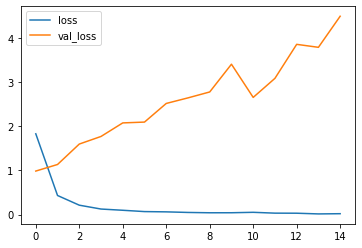

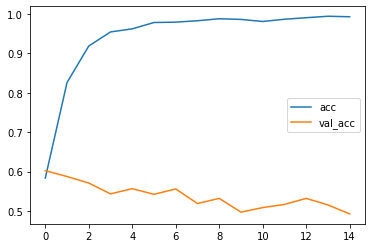

In [23]:
#Some visualizations
import matplotlib.pyplot as plt
#Loss
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()
#Accuracy
plt.plot(history.history['accuracy'],label='acc')
plt.plot(history.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [24]:
model.evaluate(test_data,test_labels)

54/54 [==============================] - 1s 24ms/step - loss: 5.6803 - accuracy: 0.4337


[5.6803178787231445, 0.4337209165096283]

In [25]:

from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(classification_report(np.argmax(test_labels,axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.37      0.44      0.40       220
           1       0.38      0.23      0.29       750
           2       0.47      0.64      0.54       750

    accuracy                           0.43      1720
   macro avg       0.41      0.43      0.41      1720
weighted avg       0.42      0.43      0.41      1720



Confusion matrix:
[[ 96  78  46]
 [ 95 173 482]
 [ 70 203 477]]


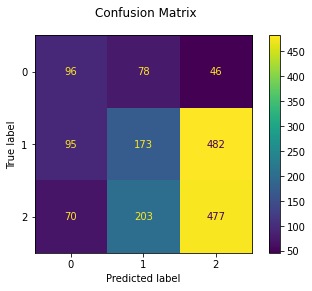

In [26]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(np.argmax(test_labels,axis=1), y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")